In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
#!unzip compas-scores-raw.csv.zip

In [3]:
#df = pd.read_csv("compas-scores-raw.csv")

In [4]:
#!pip install ucimlrepo

In [5]:
import pandas as pd

# Cargar el dataset desde un archivo CSV
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]
data = pd.read_csv(url, header=None, names=column_names, na_values=" ?", skipinitialspace=True)

# Features y target
X = data.drop(columns=["income","education"])
y = data["income"]
#X

In [6]:
y = y.loc[ X['race'].isin(['White','Black']) ].reset_index(drop = True)
X = X.loc[ X['race'].isin(['White','Black']) ].reset_index(drop = True) #for simplicity we only analize dataset with 2 races

Subsampling de data

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_vals = le.fit_transform(y)
Uvals, counts = np.unique(y_vals, return_counts = True)

subsample_size =  min(counts)

inds_sample = np.random.choice( np.where( y_vals == 0 )[0] , size= subsample_size , replace=False)
inds_sample = list(inds_sample) + list(np.where( y_vals == 1 )[0])
X = X.loc[inds_sample]
y = y.loc[inds_sample]

True


<Axes: >

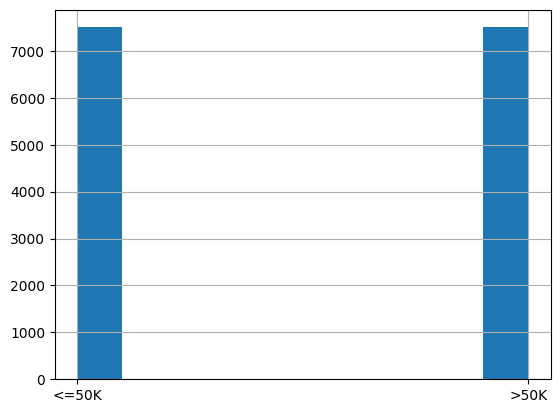

In [8]:
print(all(X.index == y.index))
y.hist()

<Axes: >

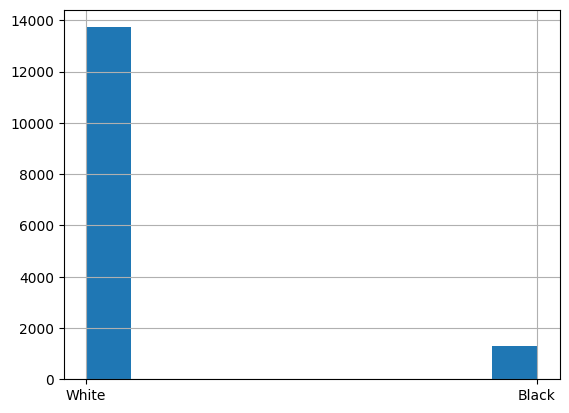

In [9]:
#Indices para las variables sensibles
sensitive_vars = X[["race", "sex"]].copy()
sensitive_vars = sensitive_vars.reset_index(drop = True)
sensitive_vars['race'].hist()

<Axes: >

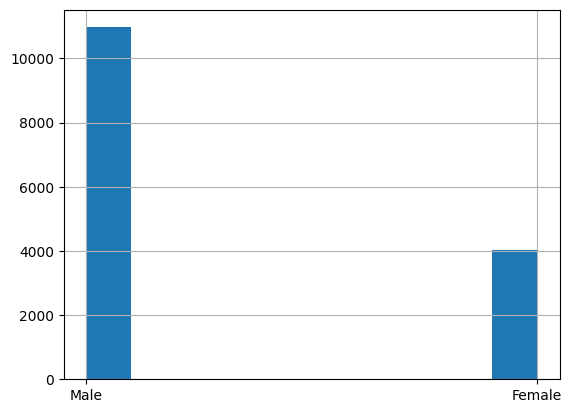

In [10]:
sensitive_vars['sex'].hist()

In [11]:
#for icol in X.columns:
  #print(icol)
  #print(len(np.unique(data[icol])))

In [12]:
num_cols = ['income','age','capital-gain','capital-loss','hours-per-week','fnlwgt','education-num',"race", "sex"]

In [13]:
X                  = pd.get_dummies(X, columns = [col for col in X.columns if col not in num_cols] , drop_first=True)
boolean_columns       = X.select_dtypes(include='bool').columns
X[boolean_columns] = X[boolean_columns].astype(int)
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)



In [14]:
Xall = pd.concat([X.copy(),y], axis = 1)
X = X.drop(columns = ["race", "sex"] )

In [15]:
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Yugoslavia
0,48,240629,9,0,0,65,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,30,193298,9,0,0,45,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,32,370160,10,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,59,212448,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,179137,10,0,0,39,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15003,71,287372,16,0,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15004,39,111499,12,0,0,20,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
15005,53,321865,14,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
15006,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


Creacion de conjuntos de entrenamiento y test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, le.fit_transform(y), test_size=.40, random_state= 18293)
X_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Yugoslavia
666,33,167771,10,0,0,30,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2945,33,183845,9,0,0,38,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4234,51,183390,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1205,35,147258,11,0,0,65,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11391,30,314310,13,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7980,47,194772,11,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8869,41,93793,14,0,0,38,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7255,48,94342,13,0,0,55,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7087,19,104844,10,0,0,15,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


Funciones

In [17]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

names_models = ['LR', 'RF', 'MLP', 'GBC']

models = [
    LogisticRegression(random_state=7465, max_iter=500),  # Logistic Regression
    RandomForestClassifier(random_state=7465, max_depth=7, criterion='gini'),  # Random Forest
    #SVC(random_state=7465, kernel='linear', C=1, probability=True),  # Support Vector Classifier
    MLPClassifier(random_state=7465, max_iter=500, hidden_layer_sizes=(500,50), alpha=0.001),  # MLP
    GradientBoostingClassifier(random_state=7465, learning_rate=0.1, criterion='friedman_mse')  # Gradient Boosting
]

# Initialize metrics dictionary
metrics = {model: {'model': None ,'y_pred': [], 'f1-score': [], 'precision': [], 'recall': []} for model in names_models}

for i, mod in enumerate(models):
    print(f"Training model: {names_models[i]}")
    mod.fit(X_train, y_train)  # Train the model

    predictions = mod.predict(X_test)  # Make predictions
    metrics[names_models[i]]['model'] = mod
    metrics[names_models[i]]['y_pred'] = predictions
    metrics[names_models[i]]['f1-score'].append(f1_score(y_test, predictions, average='macro'))
    metrics[names_models[i]]['recall'].append(recall_score(y_test, predictions))
    metrics[names_models[i]]['precision'].append(precision_score(y_test, predictions, average="micro"))

for model_name in names_models:
    print(f"Metrics for {model_name}:")
    print(f"  F1-Score: {metrics[model_name]['f1-score']}")
    print(f"  Recall: {metrics[model_name]['recall']}")
    print(f"  Precision: {metrics[model_name]['precision']}")

Training model: LR


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training model: RF
Training model: MLP
Training model: GBC
Metrics for LR:
  F1-Score: [0.799633305256854]
  Recall: [0.7941856623719855]
  Precision: [0.7996335776149234]
Metrics for RF:
  F1-Score: [0.8141257076846596]
  Recall: [0.8926329699372316]
  Precision: [0.8154563624250499]
Metrics for MLP:
  F1-Score: [0.3351788284796811]
  Recall: [1.0]
  Precision: [0.504163890739507]
Metrics for GBC:
  F1-Score: [0.8408162192209927]
  Recall: [0.861579121242154]
  Precision: [0.8409393737508328]


In [18]:
prev_f1 = 0.83

# 2.3 Medición de Sesgos

## Independencia (Demographic parity)

In [19]:
model = metrics['GBC']['model']

In [20]:
predictions   = model.predict(X)
probabilities = model.predict_proba(X)[:, 1]

In [21]:
index_test = X_test.index

In [22]:
def demo_parity2(SeriesSensitive, val_eval, index_test, predictX):
  # Atributos sensibles y etiquetas verdaderas
  indexes_sensitive = {}
  map_prob      = {}
  sen_df_test = SeriesSensitive.loc[index_test].reset_index(drop=True) #Ya son datso de test

  unique_val = np.unique( sen_df_test[val_eval] )
  d_sen = { ival: sen_df_test[val_eval][sen_df_test[val_eval].isin([ival])].index for ival in unique_val  }
  indexes_sensitive[val_eval] = d_sen
  prob_group = {ikey : np.mean(predictX[ ivalues ]) for ikey,ivalues in d_sen.items() }
  map_prob[val_eval]   = prob_group

  return map_prob, indexes_sensitive


def demo_parity(SeriesSensitive, val_eval, index_test, predictX):
  # Atributos sensibles y etiquetas verdaderas
  indexes_sensitive = {}
  map_prob      = {}
  sen_df_test = SeriesSensitive.loc[index_test]

  unique_val = np.unique( sen_df_test[val_eval] )
  d_sen = { ival: sen_df_test[val_eval][sen_df_test[val_eval].isin([ival])].index for ival in unique_val  }
  indexes_sensitive[val_eval] = d_sen
  prob_group = {ikey : np.mean(predictX[ ivalues ]) for ikey,ivalues in d_sen.items() }
  map_prob[val_eval]   = prob_group

  return map_prob, indexes_sensitive


In [23]:
import numpy as np
import pandas as pd

m, i = demo_parity( SeriesSensitive = sensitive_vars, val_eval = 'sex', index_test = index_test, predictX = probabilities )
print(m)

m, i = demo_parity( SeriesSensitive = sensitive_vars, val_eval = 'race', index_test = index_test, predictX = probabilities )
print(m)

{'sex': {'Female': 0.2945494355077708, 'Male': 0.5720791752368775}}
{'race': {'Black': 0.33129550479398, 'White': 0.5114967936709771}}


## Separación (Equalized Odds)

In [24]:
X_test_copy = X_test.copy()
X_train_copy = X_train.copy()
y_pred = model.predict(X_test_copy) # predicted income
y_real = y_test.copy() # real income
sensitive_vars_binary = sensitive_vars.copy()
sensitive_vars_binary['race'] = sensitive_vars_binary['race'].apply(lambda x: 1 if x == 'White' else 0)
sensitive_vars_binary['sex'] = sensitive_vars_binary['sex'].apply(lambda x: 1 if x == 'Male' else 0)


In [25]:
from sklearn.metrics import confusion_matrix

def eq_odds(X_test, y_pred, y_real, sensitive_vars):
  dfX = X_test.copy()
  results = {}
  dfX["income"] = y_real
  dfX["predicted_income"] = y_pred
  index = dfX.index
  vars = sensitive_vars.columns
  dfsensitive = sensitive_vars.loc[index]
  dfX = pd.concat([dfX, dfsensitive], axis=1)
  for var in vars:
    privileged_group = dfX[dfX[var] == 1]
    unprivileged_group = dfX[dfX[var] == 0]

    y_real_privileged = privileged_group["income"]
    y_pred_privileged = privileged_group["predicted_income"]

    y_real_unprivileged = unprivileged_group["income"]
    y_pred_unprivileged = unprivileged_group["predicted_income"]

    tn_privileged, fp_privileged, fn_privileged, tp_privileged = confusion_matrix(y_real_privileged, y_pred_privileged).ravel()
    # tasas TPR y FPR para el grupo privilegiado
    tpr_privileged = tp_privileged / (tp_privileged + fn_privileged)
    fpr_privileged = fp_privileged / (fp_privileged + tn_privileged)

    tn_unprivileged, fp_unprivileged, fn_unprivileged, tp_unprivileged = confusion_matrix(y_real_unprivileged, y_pred_unprivileged).ravel()
    # tasas TPR y FPR para el grupo no privilegiado
    tpr_unprivileged = tp_unprivileged / (tp_unprivileged + fn_unprivileged)
    fpr_unprivileged = fp_unprivileged / (fp_unprivileged + tn_unprivileged)

    results[var] = {"privileged_group": {"TPR": tpr_privileged, "FPR": fpr_privileged}, "unprivileged_group": {"TPR": tpr_unprivileged, "FPR": fpr_unprivileged}}
  return results

rates = eq_odds(X_test_copy, y_pred, y_real, sensitive_vars_binary)

def print_dict(d):
  for i in d:
    print(f"{i}:\n")
    for j in d[i]:
      print(f"\t{j}: {d[i][j]}\n")

print_dict(rates)

race:

	privileged_group: {'TPR': 0.864158829676071, 'FPR': 0.1901462663587375}

	unprivileged_group: {'TPR': 0.8141025641025641, 'FPR': 0.11081794195250659}

sex:

	privileged_group: {'TPR': 0.8770491803278688, 'FPR': 0.2539237668161435}

	unprivileged_group: {'TPR': 0.7763440860215054, 'FPR': 0.06957250628667226}



Las condiciones de separacion piden que:
1. TPR sean iguales entre los grupos
2. FPR sean iguales entre los grupos

Aquí, privileged_group corresponde a Male y White, y unprivileged_group corresponde a Female y Black

Se puede ver que los grupos segun la raza, su TPR difiere poco, y su FPR difiere más. Según el sexo, el TPR y FPR difieren bastante más.

Esto indica que el modelo no está siendo justo.

## Suficiencia (Predictive Parity).

In [26]:
import pandas as pd
import numpy as np

def calcular_suficiencia(y_prueba, y_probablidad, vars_sensibles, bins=5):

    # Alinear índices
    datos_ajustados = pd.DataFrame({
        'y_prueba': y_prueba,
        'probabilidades': y_probablidad,
    }).join(vars_sensibles, how='inner')

    # Actualizar variables sensibles y probabilidades
    vars_sensibles = datos_ajustados[['race', 'sex']]
    y_probablidad = datos_ajustados['probabilidades']
    y_prueba = datos_ajustados['y_prueba']

    # Calcular bins
    bins = pd.cut(y_probablidad, bins=np.linspace(0, 1, bins + 1), include_lowest=True)

    # Crear DataFrame agrupado
    agrupado = pd.DataFrame({
        'y_prueba': y_prueba,
        'bins': bins,
        'sensitive_race': vars_sensibles['race'],
        'sensitive_sex': vars_sensibles['sex']
    })

    # Sufficiency para 'race'
    tabla_suf_race = agrupado.groupby(['bins', 'sensitive_race'])['y_prueba'].mean().unstack()
    diferencia_suf_race = tabla_suf_race.max(axis=1) - tabla_suf_race.min(axis=1)

    # Sufficiency para 'sex'
    tabla_suf_sex = agrupado.groupby(['bins', 'sensitive_sex'])['y_prueba'].mean().unstack()
    diferencia_suf_sex = tabla_suf_sex.max(axis=1) - tabla_suf_sex.min(axis=1)

    # Retornar resultados en un diccionario
    return {
        'tabla_suf_race': tabla_suf_race,
        'diferencia_suf_race': diferencia_suf_race,
        'tabla_suf_sex': tabla_suf_sex,
        'diferencia_suf_sex': diferencia_suf_sex
    }
resultado = calcular_suficiencia(y_test, mod.predict_proba(X_test)[:,1], sensitive_vars, bins=4)

# Imprimir resultados
print("Suficiencia para 'race':")
print(resultado['tabla_suf_race'])
print("Diferencias en suficiencia para 'race':", resultado['diferencia_suf_race'])

print("Suficiencia para 'sex':")
print(resultado['tabla_suf_sex'])
print("Diferencias en suficiencia para 'sex':", resultado['diferencia_suf_sex'])

Suficiencia para 'race':
sensitive_race     Black     White
bins                              
(-0.001, 0.25]  0.061728  0.053093
(0.25, 0.5]     0.365591  0.391679
(0.5, 0.75]     0.659722  0.674872
(0.75, 1.0]     0.907489  0.917130
Diferencias en suficiencia para 'race': bins
(-0.001, 0.25]    0.008636
(0.25, 0.5]       0.026087
(0.5, 0.75]       0.015150
(0.75, 1.0]       0.009641
dtype: float64
Suficiencia para 'sex':
sensitive_sex     Female      Male
bins                              
(-0.001, 0.25]  0.051702  0.055599
(0.25, 0.5]     0.393548  0.385417
(0.5, 0.75]     0.640909  0.693667
(0.75, 1.0]     0.903567  0.923502
Diferencias en suficiencia para 'sex': bins
(-0.001, 0.25]    0.003897
(0.25, 0.5]       0.008132
(0.5, 0.75]       0.052758
(0.75, 1.0]       0.019935
dtype: float64


<ipython-input-26-133f7ea47184>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_suf_race = agrupado.groupby(['bins', 'sensitive_race'])['y_prueba'].mean().unstack()
<ipython-input-26-133f7ea47184>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_suf_sex = agrupado.groupby(['bins', 'sensitive_sex'])['y_prueba'].mean().unstack()


# 2.4  Mitigación de Sesgos

## Pre-procesamiento

In [27]:
pip install aif360

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 4.6 MB/s eta 0:00:00


Reweighing y Disparate Impact Remover

In [28]:
def get_EO(test_data, predicted_data, priv_group_mask, unpriv_group_mask):
    results = {}

    def calculate_rates(y_true, y_pred):
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))

        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0

        return tpr, fpr

    # Datos del grupo privilegiado
    priv_y_true = test_data[priv_group_mask]
    priv_y_pred = predicted_data[priv_group_mask]
    tpr_privileged, fpr_privileged = calculate_rates(priv_y_true, priv_y_pred)

    # Datos del grupo no privilegiado
    unpriv_y_true = test_data[unpriv_group_mask]
    unpriv_y_pred = predicted_data[unpriv_group_mask]
    tpr_unprivileged, fpr_unprivileged = calculate_rates(unpriv_y_true, unpriv_y_pred)

    # Almacenar resultados
    results = {
        "privileged_group": {"TPR": tpr_privileged, "FPR": fpr_privileged},
        "unprivileged_group": {"TPR": tpr_unprivileged, "FPR": fpr_unprivileged}
    }

    return results

In [29]:
from aif360.algorithms.preprocessing import Reweighing
from aif360.datasets                 import BinaryLabelDataset
from aif360.metrics                  import ClassificationMetric
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


In [30]:
Xall['sex']    = Xall['sex'].astype('category').cat.codes
Xall['race']   = Xall['race'].astype('category').cat.codes
Xall['income'] = Xall['income'].astype('category').cat.codes

In [31]:
def reweighing_data(data, protected_var, y_var, map_priv_group, map_nonpriv_group, remove = True, rew = True):
  non_features = protected_var + y_var #list of strings
  feature_model = [col for col in data.columns if col not in non_features]

  data_train, data_test, _, _ = train_test_split( data , data , test_size=.40, random_state= 18293)

  dataset_train = BinaryLabelDataset(
    favorable_label           = 1 ,  # Etiqueta que representa un resultado favorable
    unfavorable_label         = 0 ,  # Etiqueta que representa un resultado desfavorable
    df                        = data_train ,  # dataframe with all info
    label_names               = y_var ,  # Nombre de la columna con las etiquetas
    protected_attribute_names =  protected_var )

  dataset_test = BinaryLabelDataset(
    favorable_label           = 1 ,  # Etiqueta que representa un resultado favorable
    unfavorable_label         = 0 ,  # Etiqueta que representa un resultado desfavorable
    df                        = data_test ,  # dataframe with all info
    label_names               = y_var ,  # Nombre de la columna con las etiquetas
    protected_attribute_names =  protected_var )

  privileged_groups   = [map_priv_group]  # Privilegiados: hombres
  unprivileged_groups = [map_nonpriv_group]  # No privilegiados: mujeres
  reweighing = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

  if rew:
    dataset_transf_train = reweighing.fit_transform(dataset_train)
  else:
    dataset_transf_train = dataset_train


  if remove:
    X_removedTrain = dataset_transf_train.features[:, [dataset_transf_train.feature_names.index(col) for col in protected_var ]]
    X_train = dataset_transf_train.features[:, [dataset_transf_train.feature_names.index(col) for col in feature_model]]
  else:
    X_train = dataset_transf_train.features

  y_train = dataset_transf_train.labels.ravel()
  sample_weights = dataset_transf_train.instance_weights


  if remove:
    X_removedTest = dataset_test.features[:, [dataset_test.feature_names.index(col) for col in protected_var ]]
    X_test = dataset_test.features[:, [dataset_test.feature_names.index(col) for col in feature_model]]
  else:
    X_test = dataset_test.features

  y_test = dataset_test.labels.ravel()

  return dataset_train, dataset_test, X_train, X_test, y_train, y_test, sample_weights, privileged_groups, unprivileged_groups, data_test, X_removedTrain, X_removedTest

In [32]:
dataset_train, dataset_test, X_train, X_test, y_train, y_test, sample_weights, privileged_groups, unprivileged_groups, datatest,remoTrain, remoTest = reweighing_data(data = Xall,
                                                                                                                                        protected_var = ['sex','race'],
                                                                                                                                        y_var = ['income'],
                                                                                                                                        map_priv_group = {'race':1},
                                                                                                                                        map_nonpriv_group = {'race':0} )

re_model = GradientBoostingClassifier(random_state=7465, learning_rate=0.1, criterion='friedman_mse', n_estimators=100)
mod.fit(X_train, y_train, sample_weight = sample_weights)
y_pred = mod.predict_proba(X.to_numpy())
predictions = mod.predict(X_test)
probabilities_1 = mod.predict_proba(X_test)
new_f1score  = f1_score(y_test, predictions )
#print("F1-score:", f1score)
m, i = demo_parity( SeriesSensitive = sensitive_vars, val_eval = 'race', index_test = index_test, predictX = y_pred )
print('Cambio de statiscal parity')
print(m)
m, i = demo_parity( SeriesSensitive = sensitive_vars, val_eval = 'sex', index_test = index_test, predictX = y_pred )
print(m)


print('Cambio en f1-score del modelo')
new_f1score

Cambio de statiscal parity
{'race': {'Black': 0.5, 'White': 0.5}}
{'sex': {'Female': 0.5, 'Male': 0.5}}
Cambio en f1-score del modelo


0.845517912141352

In [33]:
rates = get_EO(test_data = y_test , predicted_data = predictions , priv_group_mask = (remoTest[:,0] == 1) , unpriv_group_mask = (remoTest[:,0] == 0) )#sex
print('SEX:')
print_dict(rates)
rates = get_EO(test_data = y_test , predicted_data = predictions , priv_group_mask = (remoTest[:,1] == 1) , unpriv_group_mask = (remoTest[:,1] == 0) )#race
print('RACE:')
print_dict(rates)

resultado = calcular_suficiencia(y_test, probabilities_1[:,1] , sensitive_vars, bins=4)
print(resultado)

SEX:
privileged_group:

	TPR: 0.8762685402029664

	FPR: 0.2539237668161435

unprivileged_group:

	TPR: 0.7806451612903226

	FPR: 0.06789606035205364

RACE:
privileged_group:

	TPR: 0.8638105189829328

	FPR: 0.18899153194765203

unprivileged_group:

	TPR: 0.8205128205128205

	FPR: 0.11345646437994723

{'tabla_suf_race': sensitive_race     Black     White
bins                              
(-0.001, 0.25]  0.058824  0.052020
(0.25, 0.5]     0.367347  0.382476
(0.5, 0.75]     0.638889  0.676768
(0.75, 1.0]     0.916300  0.919708, 'diferencia_suf_race': bins
(-0.001, 0.25]    0.006804
(0.25, 0.5]       0.015129
(0.5, 0.75]       0.037879
(0.75, 1.0]       0.003408
dtype: float64, 'tabla_suf_sex': sensitive_sex     Female      Male
bins                              
(-0.001, 0.25]  0.055696  0.050996
(0.25, 0.5]     0.381410  0.380198
(0.5, 0.75]     0.640000  0.692982
(0.75, 1.0]     0.906417  0.926984, 'diferencia_suf_sex': bins
(-0.001, 0.25]    0.004700
(0.25, 0.5]       0.001212
(0.5, 0

<ipython-input-26-133f7ea47184>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_suf_race = agrupado.groupby(['bins', 'sensitive_race'])['y_prueba'].mean().unstack()
<ipython-input-26-133f7ea47184>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_suf_sex = agrupado.groupby(['bins', 'sensitive_sex'])['y_prueba'].mean().unstack()


## In-procesamiento (Grid Search)

In [34]:
dataset_train, dataset_test, X_train, X_test, y_train, y_test, sample_weights, privileged_groups, unprivileged_groups, datatest, remoTrain, remoTest = reweighing_data(data = Xall,
                                                                                                                                        protected_var = ['sex','race'],
                                                                                                                                        y_var = ['income'],
                                                                                                                                        map_priv_group = {},
                                                                                                                                        map_nonpriv_group = {},
                                                                                                                                                  remove = True,rew = False)

In [35]:
!pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.3/232.3 kB 4.2 MB/s eta 0:00:00


In [36]:
from fairlearn.reductions import GridSearch, EqualizedOdds
from sklearn.linear_model import LogisticRegression

In [37]:
GBC2 = GradientBoostingClassifier(random_state=7465)

constraint = EqualizedOdds()
grid_search = GridSearch(estimator= GBC2 , constraints=constraint, grid_size=10)

grid_search.fit( X_train , y_train, sensitive_features = remoTrain  )
predictions = grid_search.predict(X_test)


#y_pred = mod.predict_proba(X.to_numpy())
#predictions = mod.predict(X_test)
new_f1score  = f1_score(y_test, predictions )
#print("F1-score:", f1score)
m, i = demo_parity( SeriesSensitive = sensitive_vars, val_eval = 'race', index_test = index_test, predictX = grid_search.predict_proba(X.to_numpy()) )
print('Cambio de statiscal parity')
print(m)
m, i = demo_parity( SeriesSensitive = sensitive_vars, val_eval = 'sex', index_test = index_test, predictX = grid_search.predict_proba(X.to_numpy()) )
print(m)


print('Cambio en f1-score del modelo')
new_f1score
#metric = ClassificationMetric(test, test_pred,
#                              privileged_groups=privileged_groups,
#                              unprivileged_groups=unprivileged_groups)

#print(f"Accuracy: {accuracy:.4f}")
#print(f"Disparate Impact: {metric.disparate_impact():.4f}")
#print(f"Equal Opportunity Difference: {metric.equal_opportunity_difference():.4f}")
#print(f"Average Odds Difference: {metric.average_odds_difference():.4f}")

Cambio de statiscal parity
{'race': {'Black': 0.5, 'White': 0.5}}
{'sex': {'Female': 0.5, 'Male': 0.5}}
Cambio en f1-score del modelo


0.8452438826770378

Metricas

In [38]:
from aif360.metrics import ClassificationMetric



predictions = grid_search.predict(X_test)
probabilities_1 = grid_search.predict_proba(X_test)





rates = get_EO(test_data = y_test , predicted_data = predictions, priv_group_mask = (remoTest[:,0] == 1) , unpriv_group_mask = (remoTest[:,0] == 0) )#sex
print('SEX:')
print_dict(rates)
rates = get_EO(test_data = y_test , predicted_data = predictions, priv_group_mask = (remoTest[:,1] == 1) , unpriv_group_mask = (remoTest[:,1] == 0) )#race
print('RACE:')
print_dict(rates)

resultado = calcular_suficiencia(y_test, probabilities_1[:,1] , sensitive_vars, bins=4)
print(resultado)

SEX:
privileged_group:

	TPR: 0.8770491803278688

	FPR: 0.2539237668161435

unprivileged_group:

	TPR: 0.7763440860215054

	FPR: 0.06957250628667226

RACE:
privileged_group:

	TPR: 0.864158829676071

	FPR: 0.1901462663587375

unprivileged_group:

	TPR: 0.8141025641025641

	FPR: 0.11081794195250659

{'tabla_suf_race': sensitive_race     Black     White
bins                              
(-0.001, 0.25]  0.061728  0.053093
(0.25, 0.5]     0.365591  0.391679
(0.5, 0.75]     0.659722  0.674872
(0.75, 1.0]     0.907489  0.917130, 'diferencia_suf_race': bins
(-0.001, 0.25]    0.008636
(0.25, 0.5]       0.026087
(0.5, 0.75]       0.015150
(0.75, 1.0]       0.009641
dtype: float64, 'tabla_suf_sex': sensitive_sex     Female      Male
bins                              
(-0.001, 0.25]  0.051702  0.055599
(0.25, 0.5]     0.393548  0.385417
(0.5, 0.75]     0.640909  0.693667
(0.75, 1.0]     0.903567  0.923502, 'diferencia_suf_sex': bins
(-0.001, 0.25]    0.003897
(0.25, 0.5]       0.008132
(0.5, 0.7

<ipython-input-26-133f7ea47184>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_suf_race = agrupado.groupby(['bins', 'sensitive_race'])['y_prueba'].mean().unstack()
<ipython-input-26-133f7ea47184>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_suf_sex = agrupado.groupby(['bins', 'sensitive_sex'])['y_prueba'].mean().unstack()


## Post-procesamiento (Equalized Odds Post-Processing)

In [39]:
def evaluate_model_with_eq_odds(url, sensitive_features, target, privileged_groups, unprivileged_groups):
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score
    from aif360.algorithms.postprocessing import EqOddsPostprocessing
    from aif360.datasets import StandardDataset

    # Paso 1: Cargar y preparar los datos
    data = pd.read_csv(url, header=None, skipinitialspace=True, na_values=" ?")
    data.columns = [
        "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
        "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
        "hours-per-week", "native-country", "income"
    ]
    data[target] = data[target].apply(lambda x: 1 if x == '>50K' else 0)  # Etiquetas binarias

    # Separar columnas sensibles
    sensitive_vars = data[sensitive_features]

    # Codificar columnas categóricas
    categorical_columns = data.select_dtypes(include=['object']).columns
    data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

    # Paso 2: Dividir los datos en entrenamiento y prueba
    X = data_encoded.drop(columns=[target])
    y = data_encoded[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # Paso 3: Entrenar el modelo
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Paso 4: Crear un conjunto de datos estándar con columnas sensibles
    X_test_with_sensitive = pd.concat([X_test, sensitive_vars.loc[X_test.index]], axis=1)
    for feature in sensitive_features:
        X_test_with_sensitive[f'{feature}_binary'] = X_test_with_sensitive[feature].apply(
            lambda x: 1 if x in privileged_groups[0][feature] else 0
        )
    X_test_with_sensitive = X_test_with_sensitive.drop(columns=sensitive_features)

    # Crear un StandardDataset para los datos de prueba
    dataset_orig_test = StandardDataset(
        pd.concat([X_test_with_sensitive, y_test], axis=1),
        label_name=target,
        favorable_classes=[1],
        protected_attribute_names=[f'{feature}_binary' for feature in sensitive_features],
        privileged_classes=[[1] for _ in sensitive_features]
    )

    # Paso 5: Aplicar el post-procesamiento Equalized Odds
    postprocessor = EqOddsPostprocessing(
        privileged_groups=[{f'{feature}_binary': 1 for feature in sensitive_features}],
        unprivileged_groups=[{f'{feature}_binary': 0 for feature in sensitive_features}]
    )

    # Ajustar el postprocesador
    dataset_orig_pred = dataset_orig_test.copy()
    if y_pred.ndim == 1:
        y_pred = y_pred.reshape(-1, 1)  # Asegurar que las etiquetas sean bidimensionales
    dataset_orig_pred.labels = y_pred
    postprocessor.fit(dataset_orig_test, dataset_orig_pred)
    dataset_transf = postprocessor.predict(dataset_orig_pred)

    # Paso 6: Evaluar el modelo ajustado
    y_pred_transf = dataset_transf.labels
    accuracy = accuracy_score(y_test, y_pred_transf)
    return accuracy


In [40]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
sensitive_features = ['race', 'sex']
target = 'income'
privileged_groups = [{'race': ['White'], 'sex': ['Male']}]
unprivileged_groups = [{'race': ['Other'], 'sex': ['Female']}]

accuracy = evaluate_model_with_eq_odds(
    url, sensitive_features, target, privileged_groups, unprivileged_groups
)
print(f"Precisión del modelo ajustado con Equalized Odds: {accuracy:.4f}")

Precisión del modelo ajustado con Equalized Odds: 0.8143


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Combinaciones de metodos (Pre + In + Post)

In [41]:
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.postprocessing import EqOddsPostprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

dataset_train, dataset_test, X_train, X_test, y_train, y_test, sample_weights, privileged_groups, unprivileged_groups, datatest, remoTrain, remoTest = reweighing_data(data = Xall,
                                                                                                                                        protected_var = ['sex','race'],
                                                                                                                                        y_var = ['income'],
                                                                                                                                        map_priv_group = {'race':1},
                                                                                                                                        map_nonpriv_group = {'race':0},
                                                                                                                                                  remove = True)


GBC2 = GradientBoostingClassifier(random_state=7465, learning_rate=0.1, criterion='friedman_mse') #GradientBoostingClassifier(random_state=7465)

constraint = EqualizedOdds()
grid_search = GridSearch(estimator= GBC2 , constraints=constraint, grid_size=10)

grid_search.fit( X_train , y_train, sensitive_features = remoTrain  )
predictions = grid_search.predict(X_test)
y_pred = grid_search.predict(X_test)
#y_pred = grid_search.predict_proba(X.to_numpy())

y_pred_proba = grid_search.predict_proba(X_test)


# Equalized Odds
postprocessor = EqOddsPostprocessing(
    privileged_groups=[{'race': 1, 'sex': 1}],
    unprivileged_groups=[{'race': 0, 'sex': 0}]
)

dataset_orig_pred = dataset_test.copy()
dataset_orig_pred.labels = y_pred.reshape(-1, 1)
dataset_orig_pred.scores = y_pred_proba[:, 1]

postprocessor.fit(dataset_test, dataset_orig_pred)
dataset_transf = postprocessor.predict(dataset_orig_pred)

# Paso 5: Evaluar precisión combinada
y_pred_transf = dataset_transf.labels
y_pred_proba_transf = dataset_transf.scores
final_accuracy = accuracy_score(y_test, y_pred_transf)

print(f"Precisión combinando Reweighing y Equalized Odds: {final_accuracy:.4f}")

probs = np.stack( (1 - y_pred_proba_transf, y_pred_proba_transf), axis = 1)
m, i = demo_parity2( SeriesSensitive = sensitive_vars, val_eval = 'race', index_test = index_test, predictX = probs )
print('Cambio de statiscal parity')
print(m)

m, i = demo_parity2( SeriesSensitive = sensitive_vars, val_eval = 'sex', index_test = index_test, predictX = probs )
print(m)
new_f1score  = f1_score(y_test, y_pred_transf )
print('Cambio en f1-score del modelo')
print(new_f1score)


rates = get_EO(test_data = y_test , predicted_data = y_pred_transf , priv_group_mask = (remoTest[:,0] == 1) , unpriv_group_mask = (remoTest[:,0] == 0) )#sex
print('SEX:')
print_dict(rates)
rates = get_EO(test_data = y_test , predicted_data = y_pred_transf , priv_group_mask = (remoTest[:,1] == 1) , unpriv_group_mask = (remoTest[:,1] == 0) )#race
print('RACE:')
print_dict(rates)


resultado = calcular_suficiencia(y_test, y_pred_proba_transf , sensitive_vars, bins=4)
print(resultado)

Precisión combinando Reweighing y Equalized Odds: 0.7385
Cambio de statiscal parity
{'race': {'Black': 0.5, 'White': 0.5}}
{'sex': {'Female': 0.5, 'Male': 0.5}}
Cambio en f1-score del modelo
0.7037735849056603
SEX:
privileged_group:

	TPR: 0.5064427059364933

	FPR: 0.5064427059364933

unprivileged_group:

	TPR: 0.04342581423401689

	FPR: 0.04342581423401689

RACE:
privileged_group:

	TPR: 0.40245017370634484

	FPR: 0.40245017370634484

unprivileged_group:

	TPR: 0.13457943925233645

	FPR: 0.13457943925233645

{'tabla_suf_race': sensitive_race     Black     White
bins                              
(-0.001, 0.25]  0.061728  0.053093
(0.25, 0.5]     0.365591  0.391679
(0.5, 0.75]     0.659722  0.674872
(0.75, 1.0]     0.907489  0.917130, 'diferencia_suf_race': bins
(-0.001, 0.25]    0.008636
(0.25, 0.5]       0.026087
(0.5, 0.75]       0.015150
(0.75, 1.0]       0.009641
dtype: float64, 'tabla_suf_sex': sensitive_sex     Female      Male
bins                              
(-0.001, 0.25]  

<ipython-input-26-133f7ea47184>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_suf_race = agrupado.groupby(['bins', 'sensitive_race'])['y_prueba'].mean().unstack()
<ipython-input-26-133f7ea47184>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_suf_sex = agrupado.groupby(['bins', 'sensitive_sex'])['y_prueba'].mean().unstack()


## Pre y In procesamiento

In [42]:
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.postprocessing import EqOddsPostprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

dataset_train, dataset_test, X_train, X_test, y_train, y_test, sample_weights, privileged_groups, unprivileged_groups, datatest, remoTrain, remoTest = reweighing_data(data = Xall,
                                                                                                                                        protected_var = ['sex','race'],
                                                                                                                                        y_var = ['income'],
                                                                                                                                        map_priv_group = {'race':1, 'sex':1},
                                                                                                                                        map_nonpriv_group = {'race':0, 'sex':0},
                                                                                                                                                  remove = True)

GBC2 = GradientBoostingClassifier(random_state=7465, learning_rate=0.1, criterion='friedman_mse')#GradientBoostingClassifier(random_state=7465)

constraint = EqualizedOdds()
grid_search = GridSearch(estimator= GBC2 , constraints=constraint, grid_size=10)

grid_search.fit( X_train , y_train, sensitive_features = remoTrain  )
predictions = grid_search.predict(X_test)
y_pred = grid_search.predict(X_test)
#y_pred = grid_search.predict_proba(X.to_numpy())

y_pred_proba = grid_search.predict_proba(X_test)

m, i = demo_parity2( SeriesSensitive = sensitive_vars, val_eval = 'race', index_test = index_test, predictX = y_pred_proba )
print('Cambio de statiscal parity')
print(m)

m, i = demo_parity2( SeriesSensitive = sensitive_vars, val_eval = 'sex', index_test = index_test, predictX = y_pred_proba )
print(m)
new_f1score  = f1_score(y_test, y_pred )
print('F1-Score', new_f1score)

rates = get_EO(test_data = y_test , predicted_data = y_pred , priv_group_mask = (remoTest[:,0] == 1) , unpriv_group_mask = (remoTest[:,0] == 0) )#sex
print('SEX:')
print_dict(rates)
rates = get_EO(test_data = y_test , predicted_data = y_pred , priv_group_mask = (remoTest[:,1] == 1) , unpriv_group_mask = (remoTest[:,1] == 0) )#race
print('RACE:')
print_dict(rates)

resultado = calcular_suficiencia(y_test, y_pred_proba[:,1] , sensitive_vars, bins=4)
print(resultado)

Cambio de statiscal parity
{'race': {'Black': 0.5, 'White': 0.5}}
{'sex': {'Female': 0.5, 'Male': 0.5}}
F1-Score 0.8452438826770378
SEX:
privileged_group:

	TPR: 0.8770491803278688

	FPR: 0.2539237668161435

unprivileged_group:

	TPR: 0.7763440860215054

	FPR: 0.06957250628667226

RACE:
privileged_group:

	TPR: 0.864158829676071

	FPR: 0.1901462663587375

unprivileged_group:

	TPR: 0.8141025641025641

	FPR: 0.11081794195250659

{'tabla_suf_race': sensitive_race     Black     White
bins                              
(-0.001, 0.25]  0.061728  0.053093
(0.25, 0.5]     0.365591  0.391679
(0.5, 0.75]     0.659722  0.674872
(0.75, 1.0]     0.907489  0.917130, 'diferencia_suf_race': bins
(-0.001, 0.25]    0.008636
(0.25, 0.5]       0.026087
(0.5, 0.75]       0.015150
(0.75, 1.0]       0.009641
dtype: float64, 'tabla_suf_sex': sensitive_sex     Female      Male
bins                              
(-0.001, 0.25]  0.051702  0.055599
(0.25, 0.5]     0.393548  0.385417
(0.5, 0.75]     0.640909  0.6

<ipython-input-26-133f7ea47184>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_suf_race = agrupado.groupby(['bins', 'sensitive_race'])['y_prueba'].mean().unstack()
<ipython-input-26-133f7ea47184>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_suf_sex = agrupado.groupby(['bins', 'sensitive_sex'])['y_prueba'].mean().unstack()


## Pre Post

In [43]:
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.postprocessing import EqOddsPostprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

dataset_train, dataset_test, X_train, X_test, y_train, y_test, sample_weights, privileged_groups, unprivileged_groups, datatest, remoTrain, remoTest = reweighing_data(data = Xall,
                                                                                                                                        protected_var = ['sex','race'],
                                                                                                                                        y_var = ['income'],
                                                                                                                                        map_priv_group = {'race':1, 'sex':1},
                                                                                                                                        map_nonpriv_group = {'race':0, 'sex':0},
                                                                                                                                                  remove = True)

GBC2 = GradientBoostingClassifier(random_state=7465, learning_rate=0.1, criterion='friedman_mse') # GradientBoostingClassifier(random_state=7465)

#constraint = EqualizedOdds()
#grid_search = GridSearch(estimator= GBC2 , constraints=  , grid_size=10)
grid_search = GBC2
grid_search.fit( X_train , y_train,sample_weight = sample_weights )
predictions = grid_search.predict(X_test)
y_pred = grid_search.predict(X_test)
#y_pred = grid_search.predict_proba(X.to_numpy())

y_pred_proba = grid_search.predict_proba(X_test)

m, i = demo_parity2( SeriesSensitive = sensitive_vars, val_eval = 'race', index_test = index_test, predictX = y_pred_proba )
print('Cambio de statiscal parity')
print(m)

m, i = demo_parity2( SeriesSensitive = sensitive_vars, val_eval = 'sex', index_test = index_test, predictX = y_pred_proba )
print(m)
new_f1score  = f1_score(y_test, y_pred )
print('F1-Score', new_f1score)

rates = get_EO(test_data = y_test , predicted_data = y_pred , priv_group_mask = (remoTest[:,0] == 1) , unpriv_group_mask = (remoTest[:,0] == 0) )#sex
print('SEX:')
print_dict(rates)
rates = get_EO(test_data = y_test , predicted_data = y_pred , priv_group_mask = (remoTest[:,1] == 1) , unpriv_group_mask = (remoTest[:,1] == 0) )#race
print('RACE:')
print_dict(rates)

resultado = calcular_suficiencia(y_test, y_pred_proba[:,1] , sensitive_vars, bins=4)
print(resultado)

Cambio de statiscal parity
{'race': {'Black': 0.5, 'White': 0.5}}
{'sex': {'Female': 0.5, 'Male': 0.5}}
F1-Score 0.8300341296928327
SEX:
privileged_group:

	TPR: 0.8071818891491023

	FPR: 0.17713004484304934

unprivileged_group:

	TPR: 0.7827956989247312

	FPR: 0.07124895222129086

RACE:
privileged_group:

	TPR: 0.8063392546151167

	FPR: 0.1420323325635104

unprivileged_group:

	TPR: 0.75

	FPR: 0.08443271767810026

{'tabla_suf_race': sensitive_race     Black     White
bins                              
(-0.001, 0.25]  0.074803  0.061482
(0.25, 0.5]     0.425000  0.456376
(0.5, 0.75]     0.692308  0.736175
(0.75, 1.0]     0.935961  0.927083, 'diferencia_suf_race': bins
(-0.001, 0.25]    0.013321
(0.25, 0.5]       0.031376
(0.5, 0.75]       0.043867
(0.75, 1.0]       0.008877
dtype: float64, 'tabla_suf_sex': sensitive_sex     Female      Male
bins                              
(-0.001, 0.25]  0.059179  0.065463
(0.25, 0.5]     0.459799  0.448052
(0.5, 0.75]     0.686224  0.759076
(0.75,

<ipython-input-26-133f7ea47184>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_suf_race = agrupado.groupby(['bins', 'sensitive_race'])['y_prueba'].mean().unstack()
<ipython-input-26-133f7ea47184>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_suf_sex = agrupado.groupby(['bins', 'sensitive_sex'])['y_prueba'].mean().unstack()


## In Post

In [44]:
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.postprocessing import EqOddsPostprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

dataset_train, dataset_test, X_train, X_test, y_train, y_test, sample_weights, privileged_groups, unprivileged_groups, datatest, _, _ = reweighing_data(data = Xall,
                                                                                                                                        protected_var = [],
                                                                                                                                        y_var = ['income'],
                                                                                                                                        map_priv_group = {},
                                                                                                                                        map_nonpriv_group = {},
                                                                                                                                                  remove = True,
                                                                                                                                        rew = False)

GBC2 = GradientBoostingClassifier(random_state=7465, learning_rate=0.1, criterion='friedman_mse') # GradientBoostingClassifier(random_state=7465)

constraint = EqualizedOdds()
grid_search = GridSearch(estimator= GBC2 , constraints= constraint , grid_size=10)
#grid_search = GBC2
grid_search.fit( X_train , y_train, sensitive_features = remoTrain  )
predictions = grid_search.predict(X_test)
y_pred = grid_search.predict(X_test)
#y_pred = grid_search.predict_proba(X.to_numpy())

y_pred_proba = grid_search.predict_proba(X_test)

m, i = demo_parity2( SeriesSensitive = sensitive_vars, val_eval = 'race', index_test = index_test, predictX = y_pred_proba )
print('Cambio de statiscal parity')
print(m)

m, i = demo_parity2( SeriesSensitive = sensitive_vars, val_eval = 'sex', index_test = index_test, predictX = y_pred_proba )
print(m)
new_f1score  = f1_score(y_test, y_pred )
print('F1-Score', new_f1score)

rates = get_EO(test_data = y_test , predicted_data = y_pred , priv_group_mask = (remoTest[:,0] == 1) , unpriv_group_mask = (remoTest[:,0] == 0) )#sex
print('SEX:')
print_dict(rates)
rates = get_EO(test_data = y_test , predicted_data = y_pred , priv_group_mask = (remoTest[:,1] == 1) , unpriv_group_mask = (remoTest[:,1] == 0) )#race
print('RACE:')
print_dict(rates)

resultado = calcular_suficiencia(y_test, y_pred_proba[:,1] , sensitive_vars, bins=4)
print(resultado)

Cambio de statiscal parity
{'race': {'Black': 0.5, 'White': 0.5}}
{'sex': {'Female': 0.5, 'Male': 0.5}}
F1-Score 0.8432835820895522
SEX:
privileged_group:

	TPR: 0.8797814207650273

	FPR: 0.2623318385650224

unprivileged_group:

	TPR: 0.7419354838709677

	FPR: 0.0586756077116513

RACE:
privileged_group:

	TPR: 0.8610240334378265

	FPR: 0.19168591224018475

unprivileged_group:

	TPR: 0.8141025641025641

	FPR: 0.10554089709762533

{'tabla_suf_race': sensitive_race     Black     White
bins                              
(-0.001, 0.25]  0.058091  0.053209
(0.25, 0.5]     0.391753  0.395184
(0.5, 0.75]     0.647887  0.671875
(0.75, 1.0]     0.907489  0.915929, 'diferencia_suf_race': bins
(-0.001, 0.25]    0.004882
(0.25, 0.5]       0.003432
(0.5, 0.75]       0.023988
(0.75, 1.0]       0.008440
dtype: float64, 'tabla_suf_sex': sensitive_sex     Female      Male
bins                              
(-0.001, 0.25]  0.052500  0.054589
(0.25, 0.5]     0.415033  0.382294
(0.5, 0.75]     0.636156  0.

<ipython-input-26-133f7ea47184>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_suf_race = agrupado.groupby(['bins', 'sensitive_race'])['y_prueba'].mean().unstack()
<ipython-input-26-133f7ea47184>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_suf_sex = agrupado.groupby(['bins', 'sensitive_sex'])['y_prueba'].mean().unstack()
